In [1]:
#Importing Packages
from matplotlib import pyplot as plt
import numpy as np
from scipy.integrate import odeint

In [2]:
#Defining the ODE
def func(PM,t,A_p,a,j,k,K_m,S_e,v_m,V,W,y,z):
    P,P_b,P_u,S = PM
    dPdt = y - k*S_e*P - k/W*S*P + j*P_b
    dP_bdt = k*S_e*P + k/W*S*P - j*P_b - a*P_b
    dP_udt = a*P_b - z*P_u
    dSdt = -k/W*S*(A_p/V)*P + (j+a)*(A_p/V)*P_b +  - v_m*S/(V*(K_m + S))
    dydt = [dPdt, dP_bdt, dP_udt, dSdt]
    return dydt

In [3]:
#Defining Variables
a = 1
A_p = 314
j = 10**2
K_d = 0.74
K_m = 2.5
k = j/K_d
v_m = 8.8 * 10**3
V = 523
W = 32
y = 0.000083
z = .002

In [4]:
#Defining Changing Extracellular Uracil
Se1 = .1
Se2 = .01
Se3 = .1

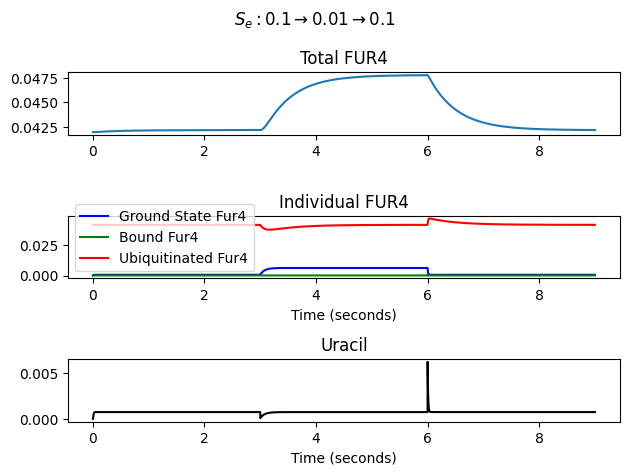

In [5]:
#Running the ODE

#Setting Initial Condition and Timespan
y0 = [0,0,0.042,0]
t1 = np.linspace(0,3000,10000)

#Solving the ODE
sol1 = odeint(func,y0,t1,args = (A_p,a,j,k,K_m,Se1,v_m,V,W,y,z))

y0 = sol1[-1,:]
t2 = np.linspace(0,3000,10000)

#Solving the ODE
sol2 = odeint(func,y0,t2,args = (A_p,a,j,k,K_m,Se2,v_m,V,W,y,z))

y0 = sol2[-1,:]
t3 = np.linspace(0,3000,10000)

#Solving the ODE
sol3 = odeint(func,y0,t3,args = (A_p,a,j,k,K_m,Se3,v_m,V,W,y,z))

t_span = np.hstack([t1,t2+3000,t2+6000]) * 10**(-3)
sol_tot = np.vstack([sol1,sol2,sol3])

#Plotting the Solution
fig, ax = plt.subplots(3,1)

ax[0].plot(t_span,sol_tot[:,0]+sol_tot[:,1]+sol_tot[:,2])
ax[0].set_title("Total FUR4")
ax[1].set_xlabel("Time (seconds)")

ax[1].plot(t_span,sol_tot[:,0],'b',label = "Ground State Fur4")
ax[1].plot(t_span,sol_tot[:,1],'g',label = "Bound Fur4")
ax[1].plot(t_span,sol_tot[:,2],'r',label = "Ubiquitinated Fur4")
ax[1].set_xlabel("Time (seconds)")
ax[1].legend()
ax[1].set_title("Individual FUR4")

ax[2].plot(t_span,sol_tot[:,3],'k',label = "Intracellullar Uracil")
ax[2].set_xlabel("Time (seconds)")
ax[2].set_title("Uracil")

plt.suptitle(fr"$S_e: {Se1}\rightarrow{Se2}\rightarrow{Se3}$")
plt.tight_layout()
plt.show()